In [21]:
import numpy as np
import random
import codecs
import copy
import re
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [7]:
def calEuclidDist(x1,x2):
    #计算两个向量之间的欧式距离
    return np.sqrt(np.sum(np.square(x1,x2)))
x1 = np.array([1,1,2])
x2 = np.array([1,2,3])
dist_test = calEuclidDist(x1,x2)
dist_test

2.449489742783178

In [8]:
def initCentroids(dataSet,k):
    #初始化聚类中心
    num, dim = dataSet.shape
    centroids = np.zeros((k,dim))
    for i in range(k):
        index = int(random.uniform(0,num))
        centroids[i,:] = dataSet[index,:]
    return centroids

In [45]:
def k_means(dataSet,k):
    num,dim = dataSet.shape
    clusterAssment = np.zeros((num,2))
    clusterChanged = True
    
    #step1:初始化
    centroids = initCentroids(dataSet,k)
    
    while clusterChanged:
        clusterChanged = False
        for i in range(num):
            minDist = float("inf")
            minIndex = 0
            for j in range(k):
                dist = calEuclidDist(dataSet[i,:],centroids[j,:])
                if dist < minDist:
                    minDist = dist
                    minIndex = j
            
            if clusterAssment[i,0] != minIndex:
                clusterChanged = True
                clusterAssment[i,:] = minIndex,minDist**2
        
        for j in range(k):
            sampleInCluster = dataSet[clusterAssment[:,0]==j]
            centroids[j,:] = np.mean(sampleInCluster,axis = 0)
        return centroids,clusterAssment
        
        

In [28]:
df = pd.read_csv('iris.data')


In [29]:
df.columns = ['sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'class']

In [38]:
train_df = df[['petal_len','sepal_width','class']]

Text(0.5, 1.0, 'class')

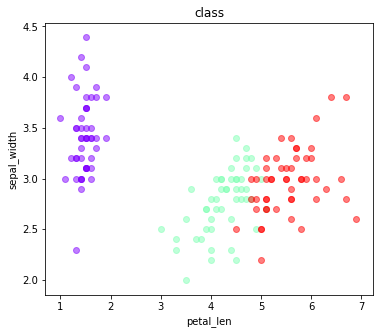

In [39]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

def scatter_plot_by_category(feat, x, y):
    alpha = 0.5
    gs = train_df.groupby(feat)
    cs = cm.rainbow(np.linspace(0, 1, len(gs)))
    for g, c in zip(gs, cs):
        plt.scatter(g[1][x], g[1][y], color=c, alpha=alpha)

plt.figure(figsize=(20,5))

plt.subplot(131)
scatter_plot_by_category('class', 'petal_len', 'sepal_width')
plt.xlabel('petal_len')
plt.ylabel('sepal_width')
plt.title('class')


In [41]:
train_np = train_df.iloc[:,0:2].values



In [46]:
centroids,clusterAssment = k_means(train_np,3)

C:\Users\lsx552\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\lsx552\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [48]:
clusterAssment

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.